In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,SimpleRNN,LSTM
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.preprocessing import MinMaxScaler,StandardScaler
import tensorflow as tf 
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.preprocessing import MinMaxScaler,StandardScaler
df0 = pd.read_csv('BİST 100 Geçmiş Verileri.csv')
df0

,Tarih,Şimdi,Açılış,Yüksek,Düşük,Hac.,Fark %
0,06.11.2022,"4.455,53","4.216,98","4.552,44","4.216,98","5,43B","5,66%"
1,30.10.2022,"4.216,98","3.884,64","4.233,58","3.880,87","21,30B","8,71%"
2,23.10.2022,"3.878,98","3.946,13","4.015,62","3.877,55","19,54B","-1,41%"
3,16.10.2022,"3.934,63","3.641,40","3.952,22","3.641,40","29,41B","8,48%"
4,09.10.2022,"3.626,96","3.574,09","3.640,55","3.510,86","17,81B","1,66%"
...,...,...,...,...,...,...,...
457,02.02.2014,"646,14","621,66","649,24","608,49","3,40B","4,46%"
458,26.01.2014,"618,58","643,60","655,47","607,54","3,96B","-3,99%"
459,19.01.2014,"644,28","648,96","674,51","632,72","3,28B","-1,84%"
460,12.01.2014,"656,35","683,90","686,91","656,35","3,00B","-3,35%"


In [52]:
df0.rename(columns = {'Hac.':'Hac'}, inplace = True)
df0["Hac"]=df0["Hac"].str.replace('B','000000')
df0["Hac"]=df0["Hac"].str.replace('M','000')
df0["Hac"]=df0["Hac"].str.replace(',','.')
df0.Hac = df0.Hac.astype(float)
df0

,Tarih,Şimdi,Açılış,Yüksek,Düşük,Hac,Fark %
0,06.11.2022,"4.455,53","4.216,98","4.552,44","4.216,98",5.43,"5,66%"
1,30.10.2022,"4.216,98","3.884,64","4.233,58","3.880,87",21.30,"8,71%"
2,23.10.2022,"3.878,98","3.946,13","4.015,62","3.877,55",19.54,"-1,41%"
3,16.10.2022,"3.934,63","3.641,40","3.952,22","3.641,40",29.41,"8,48%"
4,09.10.2022,"3.626,96","3.574,09","3.640,55","3.510,86",17.81,"1,66%"
...,...,...,...,...,...,...,...
457,02.02.2014,"646,14","621,66","649,24","608,49",3.40,"4,46%"
458,26.01.2014,"618,58","643,60","655,47","607,54",3.96,"-3,99%"
459,19.01.2014,"644,28","648,96","674,51","632,72",3.28,"-1,84%"
460,12.01.2014,"656,35","683,90","686,91","656,35",3.00,"-3,35%"


In [53]:
li=[220,331,68,321]
for i in li:
    k1=df0['Hac'].loc[i]*.001
    df0['Hac'].loc[i]=k1
df0[217:225]

C:\Users\atakan\AppData\Local\Temp\ipykernel_13744\670408784.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df0['Hac'].loc[i]=k1


,Tarih,Şimdi,Açılış,Yüksek,Düşük,Hac,Fark %
217,09.09.2018,"947,60","935,33","962,99","912,06",6.030,"1,59%"
218,02.09.2018,"932,74","922,91","946,56","922,06",4.590,"0,59%"
219,26.08.2018,"927,23","909,21","942,80","899,99",4.220,"2,81%"
220,19.08.2018,"901,86","889,85","904,76","889,39",0.389,"1,64%"
221,12.08.2018,"887,35","938,70","952,99","846,54",8.970,"-6,54%"
222,05.08.2018,"949,40","952,90","987,44","885,98",8.490,"-0,70%"
223,29.07.2018,"956,10","953,40","974,10","941,53",5.790,"0,03%"
224,22.07.2018,"955,85","941,73","966,81","917,23",7.110,"1,60%"


In [54]:
df0

,Tarih,Şimdi,Açılış,Yüksek,Düşük,Hac,Fark %
0,06.11.2022,"4.455,53","4.216,98","4.552,44","4.216,98",5.43,"5,66%"
1,30.10.2022,"4.216,98","3.884,64","4.233,58","3.880,87",21.30,"8,71%"
2,23.10.2022,"3.878,98","3.946,13","4.015,62","3.877,55",19.54,"-1,41%"
3,16.10.2022,"3.934,63","3.641,40","3.952,22","3.641,40",29.41,"8,48%"
4,09.10.2022,"3.626,96","3.574,09","3.640,55","3.510,86",17.81,"1,66%"
...,...,...,...,...,...,...,...
457,02.02.2014,"646,14","621,66","649,24","608,49",3.40,"4,46%"
458,26.01.2014,"618,58","643,60","655,47","607,54",3.96,"-3,99%"
459,19.01.2014,"644,28","648,96","674,51","632,72",3.28,"-1,84%"
460,12.01.2014,"656,35","683,90","686,91","656,35",3.00,"-3,35%"


In [55]:
df1 = pd.read_csv('USD_TRY Geçmiş Verileri.csv')
df1

,Tarih,Şimdi,Açılış,Yüksek,Düşük,Hac.,Fark %
0,06.11.2022,"18,5783","18,5960","18,7129","18,4147",NaN,"0,07%"
1,30.10.2022,"18,5657","18,5940","18,7257","18,4598",NaN,"-0,08%"
2,23.10.2022,"18,5813","18,5960","18,7120","18,4335",NaN,"-0,04%"
3,16.10.2022,"18,5884","18,5760","18,6933","18,4517",NaN,"0,16%"
4,09.10.2022,"18,5585","18,5823","18,7070","18,4487",NaN,"-0,02%"
...,...,...,...,...,...,...,...
427,31.08.2014,"2,1590","2,1610","2,1802","2,1442",NaN,"-0,23%"
428,24.08.2014,"2,1639","2,1786","2,1827","2,1477",NaN,"-0,53%"
429,17.08.2014,"2,1755","2,1623","2,1888","2,1562",NaN,"0,39%"
430,10.08.2014,"2,1671","2,1444","2,1782","2,1332",NaN,"1,03%"


In [56]:
df2=df0.merge(df1, left_on='Tarih', right_on='Tarih')
df2

,Tarih,Şimdi_x,Açılış_x,Yüksek_x,Düşük_x,Hac,Fark %_x,Şimdi_y,Açılış_y,Yüksek_y,Düşük_y,Hac.,Fark %_y
0,06.11.2022,"4.455,53","4.216,98","4.552,44","4.216,98",5.43,"5,66%","18,5783","18,5960","18,7129","18,4147",NaN,"0,07%"
1,30.10.2022,"4.216,98","3.884,64","4.233,58","3.880,87",21.30,"8,71%","18,5657","18,5940","18,7257","18,4598",NaN,"-0,08%"
2,23.10.2022,"3.878,98","3.946,13","4.015,62","3.877,55",19.54,"-1,41%","18,5813","18,5960","18,7120","18,4335",NaN,"-0,04%"
3,16.10.2022,"3.934,63","3.641,40","3.952,22","3.641,40",29.41,"8,48%","18,5884","18,5760","18,6933","18,4517",NaN,"0,16%"
4,09.10.2022,"3.626,96","3.574,09","3.640,55","3.510,86",17.81,"1,66%","18,5585","18,5823","18,7070","18,4487",NaN,"-0,02%"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
427,31.08.2014,"821,93","804,55","823,48","801,79",2.52,"2,34%","2,1590","2,1610","2,1802","2,1442",NaN,"-0,23%"
428,24.08.2014,"803,13","791,73","816,11","789,23",2.32,"1,75%","2,1639","2,1786","2,1827","2,1477",NaN,"-0,53%"
429,17.08.2014,"789,30","771,77","795,25","765,40",2.89,"2,92%","2,1755","2,1623","2,1888","2,1562",NaN,"0,39%"
430,10.08.2014,"766,92","804,27","804,83","766,26",3.07,"-3,17%","2,1671","2,1444","2,1782","2,1332",NaN,"1,03%"


In [57]:
df3 = pd.read_csv('GAU_TRY Geçmiş Verileri.csv')


df3

,Tarih,Şimdi,Açılış,Yüksek,Düşük,Hac.,Fark %
0,06.11.2022,"1.057,464","1.005,222","1.058,021","990,587",NaN,"5,42%"
1,30.10.2022,"1.003,130","983,013","1.004,380","967,874",NaN,"2,01%"
2,23.10.2022,"983,335","990,974","1.001,793","980,254",NaN,"-0,80%"
3,16.10.2022,"991,284","981,928","996,684","967,567",NaN,"0,91%"
4,09.10.2022,"982,309","1.012,583","1.019,096","980,587",NaN,"-2,95%"
...,...,...,...,...,...,...,...
425,14.09.2014,"87,366","87,490","88,280","87,161",NaN,"-0,45%"
426,07.09.2014,"87,760","88,042","89,317","87,248",NaN,"-0,35%"
427,31.08.2014,"88,069","89,455","89,759","87,435",NaN,"-1,63%"
428,24.08.2014,"89,526","89,602","90,442","88,755",NaN,"-0,04%"


In [58]:
df4=df3.merge(df2, left_on='Tarih', right_on='Tarih')
df4

,Tarih,Şimdi,Açılış,Yüksek,Düşük,Hac._x,Fark %,Şimdi_x,Açılış_x,Yüksek_x,Düşük_x,Hac,Fark %_x,Şimdi_y,Açılış_y,Yüksek_y,Düşük_y,Hac._y,Fark %_y
0,06.11.2022,"1.057,464","1.005,222","1.058,021","990,587",NaN,"5,42%","4.455,53","4.216,98","4.552,44","4.216,98",5.43,"5,66%","18,5783","18,5960","18,7129","18,4147",NaN,"0,07%"
1,30.10.2022,"1.003,130","983,013","1.004,380","967,874",NaN,"2,01%","4.216,98","3.884,64","4.233,58","3.880,87",21.30,"8,71%","18,5657","18,5940","18,7257","18,4598",NaN,"-0,08%"
2,23.10.2022,"983,335","990,974","1.001,793","980,254",NaN,"-0,80%","3.878,98","3.946,13","4.015,62","3.877,55",19.54,"-1,41%","18,5813","18,5960","18,7120","18,4335",NaN,"-0,04%"
3,16.10.2022,"991,284","981,928","996,684","967,567",NaN,"0,91%","3.934,63","3.641,40","3.952,22","3.641,40",29.41,"8,48%","18,5884","18,5760","18,6933","18,4517",NaN,"0,16%"
4,09.10.2022,"982,309","1.012,583","1.019,096","980,587",NaN,"-2,95%","3.626,96","3.574,09","3.640,55","3.510,86",17.81,"1,66%","18,5585","18,5823","18,7070","18,4487",NaN,"-0,02%"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
425,14.09.2014,"87,366","87,490","88,280","87,161",NaN,"-0,45%","769,22","776,86","794,06","769,22",2.72,"-1,16%","2,2347","2,2203","2,2407","2,1977",NaN,"0,53%"
426,07.09.2014,"87,760","88,042","89,317","87,248",NaN,"-0,35%","778,21","823,92","826,28","777,04",2.82,"-5,32%","2,2230","2,1590","2,2234","2,1562",NaN,"2,96%"
427,31.08.2014,"88,069","89,455","89,759","87,435",NaN,"-1,63%","821,93","804,55","823,48","801,79",2.52,"2,34%","2,1590","2,1610","2,1802","2,1442",NaN,"-0,23%"
428,24.08.2014,"89,526","89,602","90,442","88,755",NaN,"-0,04%","803,13","791,73","816,11","789,23",2.32,"1,75%","2,1639","2,1786","2,1827","2,1477",NaN,"-0,53%"


In [59]:
df5=df4.drop(columns=['Açılış', 'Yüksek','Düşük','Fark %','Açılış_x','Yüksek_x','Düşük_x','Hac._x','Fark %_x','Açılış_y','Yüksek_y','Düşük_y','Hac._y','Fark %_y'])
df5

,Tarih,Şimdi,Şimdi_x,Hac,Şimdi_y
0,06.11.2022,"1.057,464","4.455,53",5.43,"18,5783"
1,30.10.2022,"1.003,130","4.216,98",21.30,"18,5657"
2,23.10.2022,"983,335","3.878,98",19.54,"18,5813"
3,16.10.2022,"991,284","3.934,63",29.41,"18,5884"
4,09.10.2022,"982,309","3.626,96",17.81,"18,5585"
...,...,...,...,...,...
425,14.09.2014,"87,366","769,22",2.72,"2,2347"
426,07.09.2014,"87,760","778,21",2.82,"2,2230"
427,31.08.2014,"88,069","821,93",2.52,"2,1590"
428,24.08.2014,"89,526","803,13",2.32,"2,1639"


In [60]:
df6=df5.iloc[::-1].reset_index(drop=True)
df6

,Tarih,Şimdi,Şimdi_x,Hac,Şimdi_y
0,17.08.2014,"89,566","789,30",2.89,"2,1755"
1,24.08.2014,"89,526","803,13",2.32,"2,1639"
2,31.08.2014,"88,069","821,93",2.52,"2,1590"
3,07.09.2014,"87,760","778,21",2.82,"2,2230"
4,14.09.2014,"87,366","769,22",2.72,"2,2347"
...,...,...,...,...,...
425,09.10.2022,"982,309","3.626,96",17.81,"18,5585"
426,16.10.2022,"991,284","3.934,63",29.41,"18,5884"
427,23.10.2022,"983,335","3.878,98",19.54,"18,5813"
428,30.10.2022,"1.003,130","4.216,98",21.30,"18,5657"


In [61]:
df6["Şimdi_y"]=df6["Şimdi_y"].str.replace(',','.')
df6.Şimdi_y = df6.Şimdi_y.astype(float)
df6

,Tarih,Şimdi,Şimdi_x,Hac,Şimdi_y
0,17.08.2014,"89,566","789,30",2.89,2.1755
1,24.08.2014,"89,526","803,13",2.32,2.1639
2,31.08.2014,"88,069","821,93",2.52,2.1590
3,07.09.2014,"87,760","778,21",2.82,2.2230
4,14.09.2014,"87,366","769,22",2.72,2.2347
...,...,...,...,...,...
425,09.10.2022,"982,309","3.626,96",17.81,18.5585
426,16.10.2022,"991,284","3.934,63",29.41,18.5884
427,23.10.2022,"983,335","3.878,98",19.54,18.5813
428,30.10.2022,"1.003,130","4.216,98",21.30,18.5657


<AxesSubplot:>

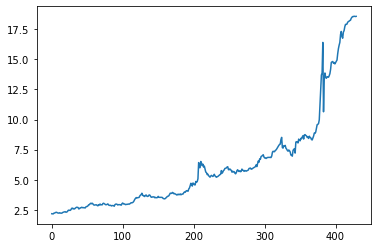

In [62]:
df6['Şimdi_y'].plot()

In [63]:
df6["Şimdi"]=df6["Şimdi"].str.replace('.','')
df6["Şimdi"]=df6["Şimdi"].str.replace(',','.')
df6.Şimdi = df6.Şimdi.astype(float)
df6

C:\Users\atakan\AppData\Local\Temp\ipykernel_13744\2229491978.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df6["Şimdi"]=df6["Şimdi"].str.replace('.','')


,Tarih,Şimdi,Şimdi_x,Hac,Şimdi_y
0,17.08.2014,89.566,"789,30",2.89,2.1755
1,24.08.2014,89.526,"803,13",2.32,2.1639
2,31.08.2014,88.069,"821,93",2.52,2.1590
3,07.09.2014,87.760,"778,21",2.82,2.2230
4,14.09.2014,87.366,"769,22",2.72,2.2347
...,...,...,...,...,...
425,09.10.2022,982.309,"3.626,96",17.81,18.5585
426,16.10.2022,991.284,"3.934,63",29.41,18.5884
427,23.10.2022,983.335,"3.878,98",19.54,18.5813
428,30.10.2022,1003.130,"4.216,98",21.30,18.5657


In [64]:

df6["Şimdi_x"]=df6["Şimdi_x"].str.replace('.','')
df6["Şimdi_x"]=df6["Şimdi_x"].str.replace(',','.')
df6.Şimdi_x = df6.Şimdi_x.astype(float)
df6

C:\Users\atakan\AppData\Local\Temp\ipykernel_13744\4018767222.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df6["Şimdi_x"]=df6["Şimdi_x"].str.replace('.','')


,Tarih,Şimdi,Şimdi_x,Hac,Şimdi_y
0,17.08.2014,89.566,789.30,2.89,2.1755
1,24.08.2014,89.526,803.13,2.32,2.1639
2,31.08.2014,88.069,821.93,2.52,2.1590
3,07.09.2014,87.760,778.21,2.82,2.2230
4,14.09.2014,87.366,769.22,2.72,2.2347
...,...,...,...,...,...
425,09.10.2022,982.309,3626.96,17.81,18.5585
426,16.10.2022,991.284,3934.63,29.41,18.5884
427,23.10.2022,983.335,3878.98,19.54,18.5813
428,30.10.2022,1003.130,4216.98,21.30,18.5657


<AxesSubplot:>

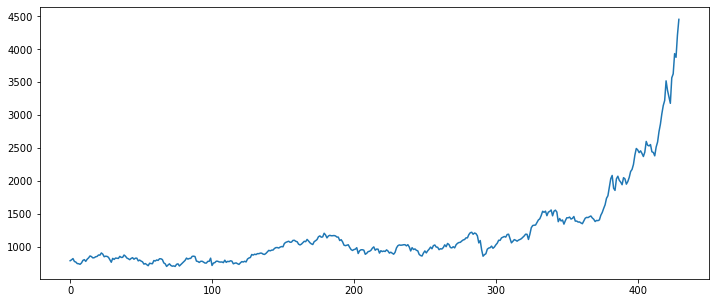

In [65]:
df6['Şimdi_x'].plot(figsize=(12,5))

In [66]:
df6.rename(columns = {'Şimdi_x':'bist'}, inplace = True)
df6.rename(columns = {'Şimdi':'grama'}, inplace = True)
df6.rename(columns = {'Şimdi_y':'dolar'}, inplace = True)


In [67]:
df6

,Tarih,grama,bist,Hac,dolar
0,17.08.2014,89.566,789.30,2.89,2.1755
1,24.08.2014,89.526,803.13,2.32,2.1639
2,31.08.2014,88.069,821.93,2.52,2.1590
3,07.09.2014,87.760,778.21,2.82,2.2230
4,14.09.2014,87.366,769.22,2.72,2.2347
...,...,...,...,...,...
425,09.10.2022,982.309,3626.96,17.81,18.5585
426,16.10.2022,991.284,3934.63,29.41,18.5884
427,23.10.2022,983.335,3878.98,19.54,18.5813
428,30.10.2022,1003.130,4216.98,21.30,18.5657


In [68]:
dfx = pd.read_csv('S&P 500 Geçmiş Verileri.csv')
dfx

,Tarih,Şimdi,Açılış,Yüksek,Düşük,Hac.,Fark %
0,13.11.2022,"3.965,34","3.973,63","4.029,99","3.906,26",NaN,"-0,69%"
1,06.11.2022,"3.992,93","3.786,60","4.001,60","3.743,85",NaN,"5,90%"
2,30.10.2022,"3.770,55","3.873,55","3.913,62","3.695,60",NaN,"-3,35%"
3,23.10.2022,"3.901,06","3.770,75","3.906,05","3.741,38",NaN,"3,95%"
4,16.10.2022,"3.752,75","3.652,35","3.764,55","3.646,34",NaN,"4,74%"
...,...,...,...,...,...,...,...
432,03.08.2014,"1.931,59","1.926,62","1.942,92","1.904,78",NaN,"0,33%"
433,27.07.2014,"1.925,15","1.978,25","1.984,85","1.916,37",NaN,"-2,69%"
434,20.07.2014,"1.978,34","1.976,93","1.991,39","1.965,77",NaN,"0,01%"
435,13.07.2014,"1.978,22","1.969,86","1.983,94","1.955,59",NaN,"0,54%"


In [69]:
dfx1=df6.merge(dfx, left_on='Tarih', right_on='Tarih')
dfx1

,Tarih,grama,bist,Hac,dolar,Şimdi,Açılış,Yüksek,Düşük,Hac.,Fark %
0,17.08.2014,89.566,789.30,2.89,2.1755,"1.988,40","1.958,36","1.994,76","1.958,36",NaN,"1,71%"
1,24.08.2014,89.526,803.13,2.32,2.1639,"2.003,37","1.991,74","2.005,04","1.990,52",NaN,"0,75%"
2,31.08.2014,88.069,821.93,2.52,2.1590,"2.007,71","2.004,07","2.011,17","1.990,10",NaN,"0,22%"
3,07.09.2014,87.760,778.21,2.82,2.2230,"1.985,54","2.007,17","2.007,17","1.980,26",NaN,"-1,10%"
4,14.09.2014,87.366,769.22,2.72,2.2347,"2.010,40","1.986,04","2.019,26","1.978,48",NaN,"1,25%"
...,...,...,...,...,...,...,...,...,...,...,...
425,09.10.2022,982.309,3626.96,17.81,18.5585,"3.583,07","3.651,20","3.711,73","3.490,00",NaN,"-1,55%"
426,16.10.2022,991.284,3934.63,29.41,18.5884,"3.752,75","3.652,35","3.764,55","3.646,34",NaN,"4,74%"
427,23.10.2022,983.335,3878.98,19.54,18.5813,"3.901,06","3.770,75","3.906,05","3.741,38",NaN,"3,95%"
428,30.10.2022,1003.130,4216.98,21.30,18.5657,"3.770,55","3.873,55","3.913,62","3.695,60",NaN,"-3,35%"


In [70]:
cols = [6,7,8,9,10]
dfx1.drop(dfx1.columns[cols],axis=1,inplace=True)

In [71]:
dfx1

,Tarih,grama,bist,Hac,dolar,Şimdi
0,17.08.2014,89.566,789.30,2.89,2.1755,"1.988,40"
1,24.08.2014,89.526,803.13,2.32,2.1639,"2.003,37"
2,31.08.2014,88.069,821.93,2.52,2.1590,"2.007,71"
3,07.09.2014,87.760,778.21,2.82,2.2230,"1.985,54"
4,14.09.2014,87.366,769.22,2.72,2.2347,"2.010,40"
...,...,...,...,...,...,...
425,09.10.2022,982.309,3626.96,17.81,18.5585,"3.583,07"
426,16.10.2022,991.284,3934.63,29.41,18.5884,"3.752,75"
427,23.10.2022,983.335,3878.98,19.54,18.5813,"3.901,06"
428,30.10.2022,1003.130,4216.98,21.30,18.5657,"3.770,55"


In [72]:
dfx1["Şimdi"]=dfx1["Şimdi"].str.replace('.','')
dfx1["Şimdi"]=dfx1["Şimdi"].str.replace(',','.')
dfx1.Şimdi = dfx1.Şimdi.astype(float)
dfx1

C:\Users\atakan\AppData\Local\Temp\ipykernel_13744\176364050.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  dfx1["Şimdi"]=dfx1["Şimdi"].str.replace('.','')


,Tarih,grama,bist,Hac,dolar,Şimdi
0,17.08.2014,89.566,789.30,2.89,2.1755,1988.40
1,24.08.2014,89.526,803.13,2.32,2.1639,2003.37
2,31.08.2014,88.069,821.93,2.52,2.1590,2007.71
3,07.09.2014,87.760,778.21,2.82,2.2230,1985.54
4,14.09.2014,87.366,769.22,2.72,2.2347,2010.40
...,...,...,...,...,...,...
425,09.10.2022,982.309,3626.96,17.81,18.5585,3583.07
426,16.10.2022,991.284,3934.63,29.41,18.5884,3752.75
427,23.10.2022,983.335,3878.98,19.54,18.5813,3901.06
428,30.10.2022,1003.130,4216.98,21.30,18.5657,3770.55


In [73]:
dfx1["sp500"]=dfx1["dolar"]*dfx1["Şimdi"]

In [74]:
dfx1

,Tarih,grama,bist,Hac,dolar,Şimdi,sp500
0,17.08.2014,89.566,789.30,2.89,2.1755,1988.40,4325.764200
1,24.08.2014,89.526,803.13,2.32,2.1639,2003.37,4335.092343
2,31.08.2014,88.069,821.93,2.52,2.1590,2007.71,4334.645890
3,07.09.2014,87.760,778.21,2.82,2.2230,1985.54,4413.855420
4,14.09.2014,87.366,769.22,2.72,2.2347,2010.40,4492.640880
...,...,...,...,...,...,...,...
425,09.10.2022,982.309,3626.96,17.81,18.5585,3583.07,66496.404595
426,16.10.2022,991.284,3934.63,29.41,18.5884,3752.75,69757.618100
427,23.10.2022,983.335,3878.98,19.54,18.5813,3901.06,72486.766178
428,30.10.2022,1003.130,4216.98,21.30,18.5657,3770.55,70002.900135


In [75]:
dfx1

,Tarih,grama,bist,Hac,dolar,Şimdi,sp500
0,17.08.2014,89.566,789.30,2.89,2.1755,1988.40,4325.764200
1,24.08.2014,89.526,803.13,2.32,2.1639,2003.37,4335.092343
2,31.08.2014,88.069,821.93,2.52,2.1590,2007.71,4334.645890
3,07.09.2014,87.760,778.21,2.82,2.2230,1985.54,4413.855420
4,14.09.2014,87.366,769.22,2.72,2.2347,2010.40,4492.640880
...,...,...,...,...,...,...,...
425,09.10.2022,982.309,3626.96,17.81,18.5585,3583.07,66496.404595
426,16.10.2022,991.284,3934.63,29.41,18.5884,3752.75,69757.618100
427,23.10.2022,983.335,3878.98,19.54,18.5813,3901.06,72486.766178
428,30.10.2022,1003.130,4216.98,21.30,18.5657,3770.55,70002.900135


In [76]:
cols = [5]
dfx1.drop(dfx1.columns[cols],axis=1,inplace=True)


In [77]:
dfx1

,Tarih,grama,bist,Hac,dolar,sp500
0,17.08.2014,89.566,789.30,2.89,2.1755,4325.764200
1,24.08.2014,89.526,803.13,2.32,2.1639,4335.092343
2,31.08.2014,88.069,821.93,2.52,2.1590,4334.645890
3,07.09.2014,87.760,778.21,2.82,2.2230,4413.855420
4,14.09.2014,87.366,769.22,2.72,2.2347,4492.640880
...,...,...,...,...,...,...
425,09.10.2022,982.309,3626.96,17.81,18.5585,66496.404595
426,16.10.2022,991.284,3934.63,29.41,18.5884,69757.618100
427,23.10.2022,983.335,3878.98,19.54,18.5813,72486.766178
428,30.10.2022,1003.130,4216.98,21.30,18.5657,70002.900135


In [78]:
dfx1.rename(columns = {'Tarih':'Date'}, inplace = True)

In [79]:
dfx1.head(5)

,Date,grama,bist,Hac,dolar,sp500
0,17.08.2014,89.566,789.30,2.89,2.1755,4325.764200
1,24.08.2014,89.526,803.13,2.32,2.1639,4335.092343
2,31.08.2014,88.069,821.93,2.52,2.1590,4334.645890
3,07.09.2014,87.760,778.21,2.82,2.2230,4413.855420
4,14.09.2014,87.366,769.22,2.72,2.2347,4492.640880


In [80]:
dfx1["Date"]=dfx1["Date"].str.replace('.','-')

dfx1

C:\Users\atakan\AppData\Local\Temp\ipykernel_13744\525557310.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  dfx1["Date"]=dfx1["Date"].str.replace('.','-')


,Date,grama,bist,Hac,dolar,sp500
0,17-08-2014,89.566,789.30,2.89,2.1755,4325.764200
1,24-08-2014,89.526,803.13,2.32,2.1639,4335.092343
2,31-08-2014,88.069,821.93,2.52,2.1590,4334.645890
3,07-09-2014,87.760,778.21,2.82,2.2230,4413.855420
4,14-09-2014,87.366,769.22,2.72,2.2347,4492.640880
...,...,...,...,...,...,...
425,09-10-2022,982.309,3626.96,17.81,18.5585,66496.404595
426,16-10-2022,991.284,3934.63,29.41,18.5884,69757.618100
427,23-10-2022,983.335,3878.98,19.54,18.5813,72486.766178
428,30-10-2022,1003.130,4216.98,21.30,18.5657,70002.900135


In [81]:
dfx2=dfx1.set_index('Date')
dfx2

,grama,bist,Hac,dolar,sp500
Date,,,,,
17-08-2014,89.566,789.30,2.89,2.1755,4325.764200
24-08-2014,89.526,803.13,2.32,2.1639,4335.092343
31-08-2014,88.069,821.93,2.52,2.1590,4334.645890
07-09-2014,87.760,778.21,2.82,2.2230,4413.855420
14-09-2014,87.366,769.22,2.72,2.2347,4492.640880
...,...,...,...,...,...
09-10-2022,982.309,3626.96,17.81,18.5585,66496.404595
16-10-2022,991.284,3934.63,29.41,18.5884,69757.618100
23-10-2022,983.335,3878.98,19.54,18.5813,72486.766178


In [82]:
column_to_move = dfx2.pop("bist")


dfx2.insert(0, "bist", column_to_move)
dfx2

,bist,grama,Hac,dolar,sp500
Date,,,,,
17-08-2014,789.30,89.566,2.89,2.1755,4325.764200
24-08-2014,803.13,89.526,2.32,2.1639,4335.092343
31-08-2014,821.93,88.069,2.52,2.1590,4334.645890
07-09-2014,778.21,87.760,2.82,2.2230,4413.855420
14-09-2014,769.22,87.366,2.72,2.2347,4492.640880
...,...,...,...,...,...
09-10-2022,3626.96,982.309,17.81,18.5585,66496.404595
16-10-2022,3934.63,991.284,29.41,18.5884,69757.618100
23-10-2022,3878.98,983.335,19.54,18.5813,72486.766178


In [83]:
#-------------------------------------------------------------------------------------------------------------------------------------
#VERİ İŞLEME SONU

In [84]:
df=dfx2.copy()

In [85]:
df

,bist,grama,Hac,dolar,sp500
Date,,,,,
17-08-2014,789.30,89.566,2.89,2.1755,4325.764200
24-08-2014,803.13,89.526,2.32,2.1639,4335.092343
31-08-2014,821.93,88.069,2.52,2.1590,4334.645890
07-09-2014,778.21,87.760,2.82,2.2230,4413.855420
14-09-2014,769.22,87.366,2.72,2.2347,4492.640880
...,...,...,...,...,...
09-10-2022,3626.96,982.309,17.81,18.5585,66496.404595
16-10-2022,3934.63,991.284,29.41,18.5884,69757.618100
23-10-2022,3878.98,983.335,19.54,18.5813,72486.766178


In [86]:
import seaborn as sns
from tensorflow import keras

In [87]:
df.describe()

,bist,grama,Hac,dolar,sp500
count,430.000000,430.000000,430.000000,430.000000,430.000000
mean,1195.284674,314.659705,8.501620,6.171062,20824.020726
std,599.247420,261.011650,6.974002,4.136183,19230.845954
min,702.440000,83.353000,0.389000,2.159000,4237.662960
25%,838.570000,127.107250,3.590000,3.046550,6509.312151
50%,997.235000,216.267500,5.505000,5.309500,14180.715576
75%,1209.367500,448.737500,11.350000,7.419600,27177.270293
max,4455.530000,1057.464000,37.250000,18.588400,76753.361860


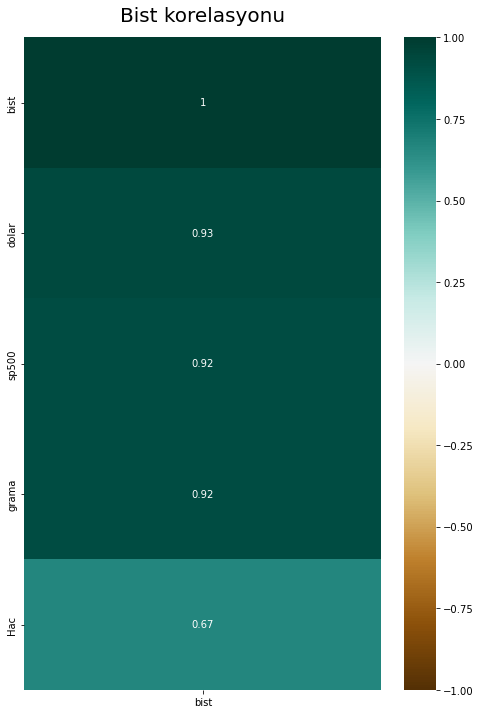

In [88]:

df.corr()[['bist']].sort_values(by='bist', ascending=False)
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df.corr()[['bist']].sort_values(by='bist', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Bist korelasyonu', fontdict={'fontsize':20}, pad=16);

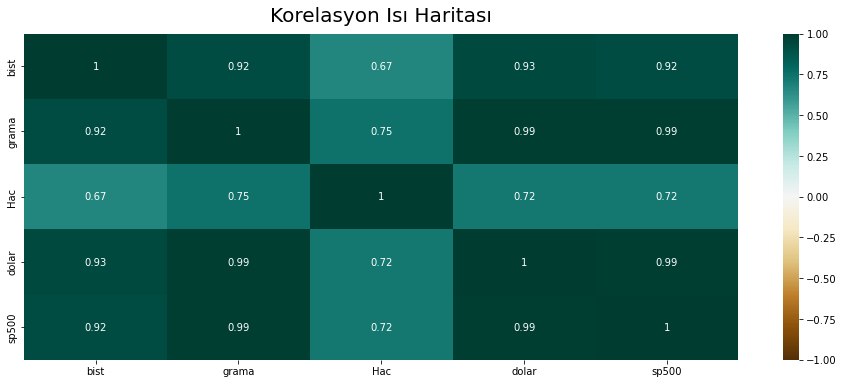

In [89]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Korelasyon Isı Haritası', fontdict={'fontsize':20}, pad=12);

# plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 430 entries, 17-08-2014 to 06-11-2022
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   bist    430 non-null    float64
 1   grama   430 non-null    float64
 2   Hac     430 non-null    float64
 3   dolar   430 non-null    float64
 4   sp500   430 non-null    float64
dtypes: float64(5)
memory usage: 20.2+ KB


In [91]:
len(df)

430

In [92]:
Xdata= df.drop('bist',axis=1).copy()


In [93]:
cols = [1,2,3,4]
df.drop(df.columns[cols],axis=1,inplace=True)

In [94]:
Ydata= df.copy()

In [95]:
Xtrain=Xdata[0:400]
Xtest=Xdata[401:416]
Xpred=Xdata[416:]
Xpred

,grama,Hac,dolar,sp500
Date,,,,
07-08-2022,1039.365,22.90,17.9324,76753.361860
14-08-2022,1016.640,27.42,18.0850,76472.060800
21-08-2022,1014.888,31.05,18.1433,73619.342678
28-08-2022,1002.159,23.61,18.1777,71334.021002
04-09-2022,1006.955,37.25,18.2334,74161.801824
11-09-2022,983.516,31.19,18.2543,70704.927819
18-09-2022,973.152,22.44,18.4131,68003.813313
25-09-2022,987.688,22.00,18.5000,66333.970000
02-10-2022,1012.208,22.39,18.5620,67559.368920


In [96]:
Ytrain=Ydata[0:400]
Ytest=Ydata[401:416]
Ypred=Ydata[416:]
Ypred

,bist
Date,
07-08-2022,2864.25
14-08-2022,3020.20
21-08-2022,3146.10
28-08-2022,3222.74
04-09-2022,3521.38
11-09-2022,3377.33
18-09-2022,3281.61
25-09-2022,3179.99
02-10-2022,3567.60


In [102]:
Xscaler = MinMaxScaler(feature_range=(0, 1)) # scale so that all the X data will range from 0 to 1
Xscaler.fit(Xdata)

MinMaxScaler()

In [103]:
scaled_Xtrain = Xscaler.transform(Xtrain)
scaled_Xtest = Xscaler.transform(Xtest)
scaled_Xpred = Xscaler.transform(Xpred)
print(scaled_Xtrain.shape)

(400, 4)


In [104]:
scaled_Xtest


array([[0.84385866, 0.47749654, 0.77194541, 0.78723353],
       [0.84451156, 0.15330566, 0.77834857, 0.79145725],
       [0.84019891, 0.4039771 , 0.8106139 , 0.800374  ],
       [0.88353278, 0.30495646, 0.83606827, 0.79672189],
       [0.9066359 , 0.41401481, 0.85345174, 0.86940582],
       [0.91917554, 0.47641138, 0.86756668, 0.87145489],
       [0.97165723, 0.4940452 , 0.90768987, 0.85991088],
       [0.96720497, 0.34782019, 0.9231317 , 0.8195574 ],
       [0.93311543, 0.33941022, 0.89638088, 0.8524496 ],
       [0.91460521, 0.33289927, 0.88879083, 0.82575003],
       [0.90722823, 0.2447302 , 0.91965014, 0.87012884],
       [0.89520188, 0.10257454, 0.92736192, 0.86825344],
       [0.92672806, 0.35812919, 0.9469792 , 0.90948202],
       [0.95897593, 0.39855131, 0.95879338, 0.96174503],
       [0.96463134, 0.5171048 , 0.95871426, 0.96535103]])

In [105]:
Yscaler = MinMaxScaler(feature_range=(0, 1)) 
Yscaler.fit(Ydata)

MinMaxScaler()

In [106]:
scaled_Ytrain = Yscaler.transform(Ytrain)
scaled_Ytest = Yscaler.transform(Ytest)
scaled_Ypred = Yscaler.transform(Ypred)
print(scaled_Ypred.shape)

(14, 1)


In [107]:
scaled_Ytrain = scaled_Ytrain.reshape(-1) 
print(scaled_Ytrain.shape)

scaled_Ytrain = np.insert(scaled_Ytrain, 0, 0)
scaled_Ytrain = np.delete(scaled_Ytrain, -1)

(400,)


In [108]:
n_input = 2 #how many samples/rows/timesteps to look in the past in order to forecast the next sample
n_features= Xtrain.shape[1] # how many predictors/Xs/features we have to predict y
b_size = 8 # Number of timeseries samples in each batch
generator = TimeseriesGenerator(scaled_Xtrain, scaled_Ytrain, length=n_input, sampling_rate=1, batch_size=b_size)

In [109]:
testgenerator = TimeseriesGenerator(scaled_Xtest, scaled_Xtest, length=n_input, sampling_rate=1, batch_size=b_size)

In [110]:
pregenerator = TimeseriesGenerator(scaled_Xpred, scaled_Xpred, length=n_input, sampling_rate=1, batch_size=b_size)

In [111]:
print(generator[0][0].shape)

(8, 2, 4)


In [135]:
model = Sequential()
model.add(LSTM(128, activation='relu',  return_sequences=True,input_shape=(n_input, n_features)))
model.add(LSTM(64, activation='relu', return_sequences=True,input_shape=(n_input, n_features)))
model.add(LSTM(32, activation='relu'))

model.add(Dense(1))
#model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_14 (LSTM)              (None, 2, 128)            68096     
                                                                 
 lstm_15 (LSTM)              (None, 2, 64)             49408     
                                                                 
 lstm_16 (LSTM)              (None, 32)                12416     
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 129,953
Trainable params: 129,953
Non-trainable params: 0
_________________________________________________________________


In [136]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=1,mode='min')

In [139]:
path_checkpoint = "model_checkpoint.h5"


modelckpt_callback = keras.callbacks.ModelCheckpoint(
    monitor="val_loss",
    filepath=path_checkpoint,
    verbose=1,
    save_weights_only=True,
    save_best_only=True,
)

In [140]:
model.compile(
    loss=tf.losses.MeanSquaredError(),
    optimizer=tf.optimizers.Adam(),
    metrics=[tf.metrics.MeanAbsolutePercentageError()]
)

In [141]:
history = model.fit_generator(
    generator,
    epochs=100,
    validation_data=testgenerator,
    shuffle=False,
    callbacks = [early_stopping,modelckpt_callback],
    use_multiprocessing=True,
    validation_steps=25,
)

Epoch 1/100


C:\Users\atakan\AppData\Local\Temp\ipykernel_4852\2008494239.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


50/50 [==============================] - ETA: 0s - loss: 0.0025 - mean_absolute_percentage_error: 68993.7656    
Epoch 1: val_loss improved from inf to 0.30397, saving model to model_checkpoint.h5
50/50 [==============================] - 41s 721ms/step - loss: 0.0025 - mean_absolute_percentage_error: 68993.7656 - val_loss: 0.3040 - val_mean_absolute_percentage_error: 62.4361
Epoch 2/100
37/50 [=====================>........] - ETA: 0s - loss: 0.0075 - mean_absolute_percentage_error: 514523.6250 
Epoch 2: val_loss improved from 0.30397 to 0.28938, saving model to model_checkpoint.h5
50/50 [==============================] - 37s 707ms/step - loss: 0.0079 - mean_absolute_percentage_error: 382670.3125 - val_loss: 0.2894 - val_mean_absolute_percentage_error: 60.7992
Epoch 3/100
36/50 [====================>.........] - ETA: 0s - loss: 0.0031 - mean_absolute_percentage_error: 378138.3750
Epoch 3: val_loss improved from 0.28938 to 0.16367, saving model to model_checkpoint.h5
50/50 [============

In [142]:
loss_per_epoch = model.history.history['loss']

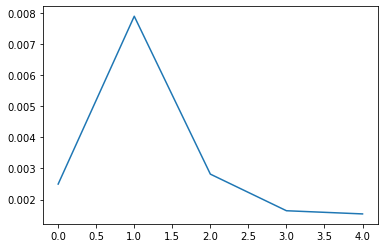

In [143]:
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [144]:

test_generator = TimeseriesGenerator(scaled_Xtest, np.zeros(len(Xtest)), length=n_input, batch_size=b_size)
print(test_generator[0][0].shape)



y_pred_scaled = model.predict(test_generator)
y_pred = Yscaler.inverse_transform(y_pred_scaled)


(8, 2, 4)
2/2 [==============================] - 1s 4ms/step


In [145]:
y_pred

array([[2133.3174],
       [2065.7898],
       [2193.048 ],
       [2252.5486],
       [2411.5493],
       [2494.8625],
       [2513.9277],
       [2405.1655],
       [2363.6108],
       [2322.2327],
       [2291.9617],
       [2310.7825],
       [2551.7656]], dtype=float32)

In [146]:
Ytest[n_input:]

,bist
Date,
08-05-2022,2419.23
15-05-2022,2372.35
22-05-2022,2438.84
29-05-2022,2601.25
05-06-2022,2543.10
12-06-2022,2533.33
19-06-2022,2554.08
26-06-2022,2443.77
03-07-2022,2434.02


In [147]:
df_pred=pd.concat([pd.DataFrame(y_pred), pd.DataFrame(Ytest[n_input:].reset_index(drop=True))],axis=1)

<AxesSubplot:>

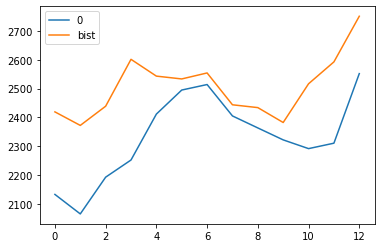

In [148]:
df_pred.plot()

In [151]:
# model.save("modelprojev2.h5")